# **bank customer churn prediction**

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [514]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [515]:
data= pd.read_csv('Churn_Modelling.csv')

In [516]:
print(len(data))
data.head(2)

10000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


**visualize the data to get understanding**

In [517]:
# checking the gender that how many females and males that are leaving the bank
# 1 --> Yes, 0 --> No
gender_exit_1 = data[data.Exited == 1].Gender
print(len(gender_exit_1))
gender_exit_0 = data[data.Exited == 0].Gender
print(len(gender_exit_0))

2037
7963


In [518]:
# creating the function to create the histogram
def plot_hist(x, y, *k, t):
    # lets plot the data using the matplot histogram
    plt.hist([x, y, *k], color=['red', 'green'], label=['yes', 'no'])
    plt.title(t)
    plt.ylabel('No.of customers')
    plt.legend()
    plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


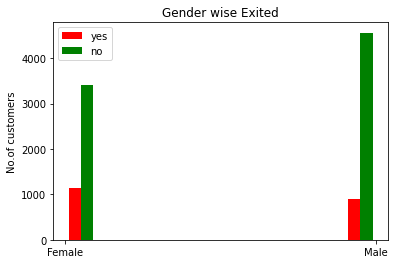

In [519]:
plot_hist(gender_exit_1, gender_exit_0, t='Gender wise Exited')

In [520]:
# extracting the customers that exit or not based on geography
geography_exit_1 = data[data.Exited == 1].Geography
geography_exit_0 = data[data.Exited == 0].Geography

In [521]:
data.Geography.value_counts() # checking the value count

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

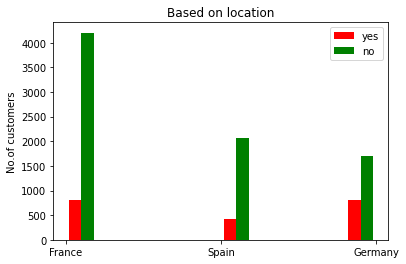

In [522]:
plot_hist(geography_exit_1, geography_exit_0, t='Based on location')

In [523]:
# checking the active members
isActive_1 = data[data.IsActiveMember == 1].Geography 
isActive_0 = data[data.IsActiveMember == 0].Geography
print(len(isActive_0), len(isActive_1))

4849 5151


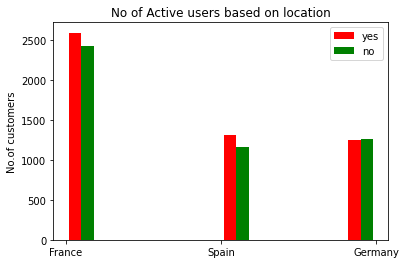

In [524]:
plot_hist(isActive_1, isActive_0, t='No of Active users based on location')

# **PreProcessing Part**

In [525]:
# drop the columns that are not needed to predictions
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [526]:
# dropping RowNumber, CustomerId, Surname, --> These are no need anymore
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [527]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [528]:
# extracting the X and Y
X = data.drop('Exited', axis=1)
Y = data.Exited

In [529]:
X.head(2)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [530]:
Y.head(2)

0    1
1    0
Name: Exited, dtype: int64

In [532]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [533]:
# here above all the datatypes are int and float 
# here we need to handle the categorical data
# i am using the pd.dummies to one hot encoding
categorical_geography=pd.get_dummies(data.Geography)
gender_categorical = pd.get_dummies(data.Gender)

In [534]:
# dropping the gender and geography
X.drop(['Gender', 'Geography'], axis=1, inplace=True)

In [535]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [536]:
# concatenating the data together after doing one hot encodeing of gender and geography
X = pd.concat([X, categorical_geography, gender_categorical], axis=1)

In [537]:
X.isnull().sum() # checking the null values

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
France             0
Germany            0
Spain              0
Female             0
Male               0
dtype: int64

In [548]:
# here Balance have some small numbers and large so normalizing the data using MinMaxScaler
# MinMaxScaler wil convert every number between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scale = ['Balance', 'EstimatedSalary']
scaler = MinMaxScaler()
X[scale] = scaler.fit_transform(X[scale])

In [549]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.000000,1,1,1,0.506735,1,0,0,1,0
1,608,41,1,0.334031,1,0,1,0.562709,0,0,1,1,0
2,502,42,8,0.636357,3,1,0,0.569654,1,0,0,1,0
3,699,39,1,0.000000,2,0,0,0.469120,1,0,0,1,0
4,850,43,2,0.500246,1,1,1,0.395400,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000000,2,1,0,0.481341,1,0,0,0,1
9996,516,35,10,0.228657,1,1,1,0.508490,1,0,0,0,1
9997,709,36,7,0.000000,1,0,1,0.210390,1,0,0,1,0
9998,772,42,3,0.299226,2,1,0,0.464429,0,1,0,0,1


# Splitting the data into train and test

In [614]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [615]:
X_train.shape

(7500, 13)

In [616]:
type(X_train)

pandas.core.frame.DataFrame

In [617]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [618]:
# create a ann model 
# layer1 takes the input 13 units are giving randomly 100
# layer2 consiste 10 units
# layer3 is the output layer 1
model = Sequential(
    [
        Dense(100, input_shape=(13, ), activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early = EarlyStopping(patience=3)
model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), callbacks=[early])

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.7181 - accuracy: 0.7531 - val_loss: 0.4789 - val_accuracy: 0.7960
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5261 - accuracy: 0.7788 - val_loss: 0.4450 - val_accuracy: 0.8120
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4978 - accuracy: 0.7916 - val_loss: 0.5539 - val_accuracy: 0.7160
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5346 - accuracy: 0.7779 - val_loss: 0.4347 - val_accuracy: 0.8136
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4863 - accuracy: 0.7909 - val_loss: 0.5975 - val_accuracy: 0.6784
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4915 - accuracy: 0.7904 - val_loss: 0.4636 - val_accuracy: 0.8088
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.5541 - accuracy: 0.7767 - val_loss: 0.4462 - val_accuracy: 0.8104


In [619]:
print('evaluate', model.evaluate(X_test, Y_test))
Y_pred_array = model.predict(X_test)
Y_pred = []
for i in Y_pred_array:
  if i > 0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
df = pd.DataFrame({'Y_actual':Y_test, 'Y_pred': Y_pred})
df.Y_pred.value_counts()
Y_pred = np.array(Y_pred)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

79/79 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8104
evaluate [0.44615137577056885, 0.8104000091552734]
79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1983
           1       0.55      0.42      0.48       517

    accuracy                           0.81      2500
   macro avg       0.71      0.67      0.68      2500
weighted avg       0.80      0.81      0.80      2500



In [620]:
print(df.Y_pred.value_counts())
df.Y_actual.value_counts()

0    2107
1     393
Name: Y_pred, dtype: int64


0    1983
1     517
Name: Y_actual, dtype: int64

# **the results may be different because we are doing random splitting becaute the majority class is 0**

# if you see in the original data majority customers are not leaving is 0 --> Not_Existing
# if you see in the original data few customer are leaving is 1 --> Existing

In [621]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64